# T test

Use this test to compare two small sets of quantitative data when samples are collected independently of one another

### 3 Types of t test
- one sample t-test
- two sample t-test
- paired sample t-test

#### One sample t-test
A one-sample t-test is used to compare a single population to a standard value (for example, to determine whether the average lifespan of a specific town is different from the country average).<br><br>
import from : `from scipy.stats import ttest_1samp`

#### Two sample t-test
A paired t-test is used to compare a single population before and after some experimental intervention or at two different points in time (for example, measuring student performance on a test before and after being taught the material). <br><br>
import from : `from scipy.stats import ttest_ind`

#### Paired sample t-test
For multiple columns <br><br>
import from : `from scipy.stats import ttest_rel`

Assumptions
------------------------
1. Data is continous
2. Sample collected is represntative of whole population
3. Data when plotted results in normal distribution
4. No major outliers are present in data
5. Standard Deviations of the two samples should be approximately equal

Formula
-----------------
P or t-value formula
$$P = \frac{|\bar{X_1} - \bar{X_2}|}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$$
where : <br><br>
$X_1, X_2$ = mean of col1, col2 <br>
$S_1, S_2$ = standard deviations of col1, col2 <br>
$n_1, n_2$ = number of observations in col1, col2

# 

# importing libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data

In [50]:
data = pd.read_csv("Golf.csv")
data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## Assumption 1 : Data is continous

In [52]:
data.head(10)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


#### Assumption 1 is fulfilled

# Assumption 2 : Sample represents population

We assume that the data is sampled properly and represents whole population

## 

# Assumption 3 : Data is normal

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


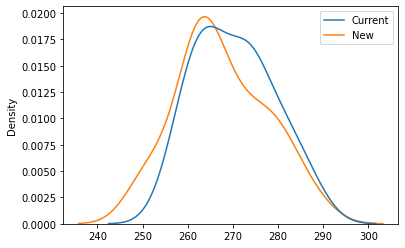

In [53]:
sns.kdeplot(data = data)
data.describe()

mean, meadian are similar in both cases and the graph looks like a normal distribution

#### Assumption 3  is satisfied

# Assumption 4 : No ouliers

<AxesSubplot:>

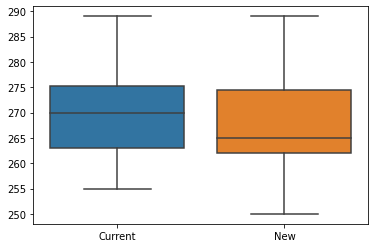

In [54]:
sns.boxplot(data = data)

No outliers are found
#### Assumption 4 is satisfied

# Assumption 5 : both standard deviation should be close

In [57]:
print(data.Current.std(), data.New.std())

8.752984838884597 9.896904462947894


almost similar
#### Assumption 5 is satisfied

## As all the assumptions are fulfilled, student t test can be done

Custom definition

In [37]:
def ttest(f1, f2):
    numerator = abs(np.mean(f1) - np.mean(f2))
    s1 = np.std(f1)
    s2 = np.std(f2)
    n1 = len(f1)
    n2 = len(f2)
    denominator = np.math.sqrt(s1**2/n1 + s2**2/n2)
    return numerator/denominator

In [87]:
ttest(data.Current, data.New)

1.3452840794843213

In [60]:
Degree_of_freedom = len(data.Current) + len(data.New) - 2
Degree_of_freedom

78

#### From the T test chart, the T/P value (critical value) for 95% significance for 78 degrees of freedom is 1.665. Our critcal value (P value) is lower, hence Null hypothesis is accepted

# Using Scipy.stats

In [71]:
from scipy.stats import ttest_ind

In [76]:
ttest_ind(data.Current, data.New)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

pvalue > 0.05 <br>
Hence Null hypothesis is accepted <br>
Thus there is no difference between New and Current and the difference caused is due to noise

# 

# 

for one sample test `from scipy.stats import ttest_1samp`
